# Discrepancy model testing

## Alexandra Semposki

### Date: 31 August 2021

In [1]:
#import packages
import numpy as np
import math
import emcee
import corner
from cycler import cycler
from scipy import stats, special, integrate

import matplotlib.pyplot as plt
# plt.style.reload_library()
# plt.style.use('science')
%matplotlib inline

#import classes we'll need
from mixing import Switching, Mixing, Models
from discrepancy import Discrepancy
from priors import Priors

In [2]:
new = Discrepancy()

In [3]:
g = np.linspace(1e-6, 0.5, 100)
low = np.array([5])
high = np.array([5])

Which interval do you want to use: 68 or 95?68
0
1
2
3
4
[ 2.50662827 -3.75994241  5.48324935]
4.102291054638137
[ 1.81280495 -0.30635418  0.11330031 -0.05744141  0.03540635 -0.02513062]
0.752566311067675


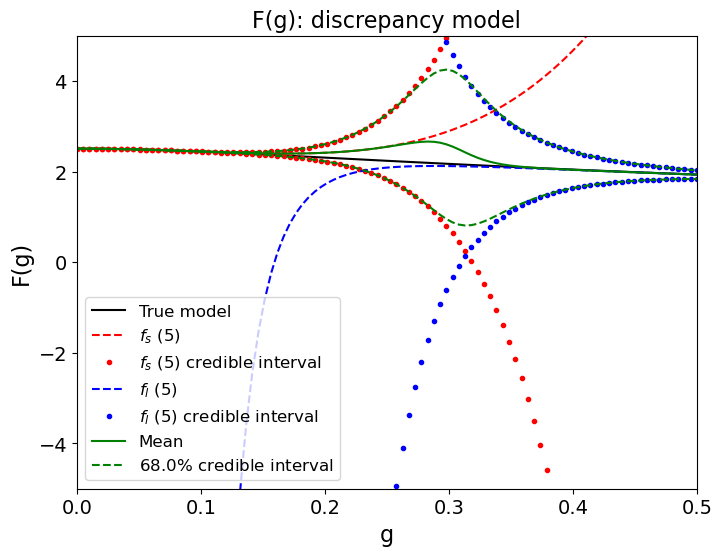

Would you like to save this figure? (yes/no)no


In [4]:
dist = new.fdagger(g, low, high, plot_fdagger=True, next_order=False, validation=False)

Which interval do you want to use: 68 or 95?68


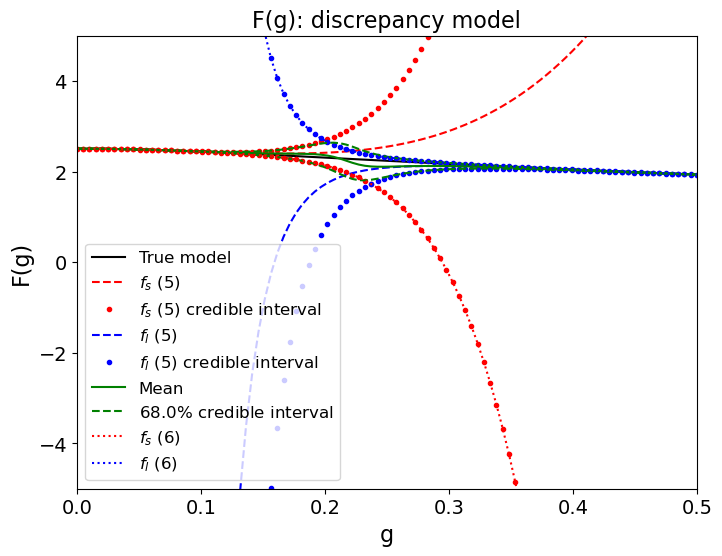

Would you like to save this figure? (yes/no)no


In [5]:
pdf = new.fdagger(g, low, high, plot_fdagger=True, next_order=True, validation=True)

Let's do some subtraction (how hard can that be?) to see if the orders match what we expect.

In [6]:
compare = Mixing()

Welcome to the BMM sandbox! Here you get to play!


In [7]:
sub_low = compare.low_g(g, np.array([6])) - compare.low_g(g, np.array([5]))
sub_high = compare.high_g(g, np.array([6])) - compare.high_g(g, np.array([5]))

print('Low: {}'.format(sub_low))
print('\nHigh: {}'.format(sub_high))

Low: [[ 0.00000000e+00 -7.21578353e-11 -4.61535121e-09 -5.25613277e-08
  -2.95294770e-07 -1.12639324e-06 -3.36325902e-06 -8.48064276e-06
  -1.88960591e-05 -3.83070940e-05 -7.20806042e-05 -1.27693808e-04
  -2.15227269e-04 -3.47909771e-04 -5.42715083e-04 -8.21010620e-04
  -1.20925799e-03 -1.73976545e-03 -2.45149221e-03 -3.39090470e-03
  -4.61288466e-03 -6.18168913e-03 -8.17196243e-03 -1.06697998e-02
  -1.37738634e-02 -1.75965494e-02 -2.22652080e-02 -2.79234142e-02
  -3.47322916e-02 -4.28718873e-02 -5.25425989e-02 -6.39666535e-02
  -7.73896384e-02 -9.30820840e-02 -1.11341098e-01 -1.32492054e-01
  -1.56890324e-01 -1.84923078e-01 -2.17011117e-01 -2.53610772e-01
  -2.95215850e-01 -3.42359630e-01 -3.95616914e-01 -4.55606128e-01
  -5.22991474e-01 -5.98485141e-01 -6.82849555e-01 -7.76899692e-01
  -8.81505441e-01 -9.97594013e-01 -1.12615241e+00 -1.26822993e+00
  -1.42494076e+00 -1.59746656e+00 -1.78705919e+00 -1.99504337e+00
  -2.22281951e+00 -2.47186649e+00 -2.74374459e+00 -3.04009839e+00
  -3.

In [8]:
compare.low_g(g, np.array([6]))

array([[  2.50662827,   2.50643647,   2.50586223,   2.50490861,
          2.50358058,   2.50188495,   2.49983015,   2.497426  ,
          2.49468345,   2.49161421,   2.48823038,   2.484544  ,
          2.48056657,   2.4763085 ,   2.4717785 ,   2.46698294,
          2.46192515,   2.45660469,   2.4510165 ,   2.44515007,
          2.43898854,   2.43250772,   2.4256751 ,   2.41844876,
          2.41077628,   2.40259354,   2.39382355,   2.38437514,
          2.37414163,   2.36299948,   2.35080688,   2.3374022 ,
          2.32260255,   2.30620211,   2.28797057,   2.26765139,
          2.2449601 ,   2.21958248,   2.19117273,   2.15935157,
          2.12370433,   2.08377889,   2.03908367,   1.98908552,
          1.93320759,   1.87082706,   1.80127297,   1.72382382,
          1.6377053 ,   1.54208778,   1.43608396,   1.31874622,
          1.18906418,   1.04596198,   0.88829567,   0.71485045,
          0.52433793,   0.31539325,   0.08657225,  -0.1636515 ,
         -0.43688964,  -0.73484212,  -1.

In [9]:
v1, v2 = new.validation(g, low, high)

#calculate the 68% credibility intervals and print
sd1 = np.sqrt(v1)
sd2 = np.sqrt(v2)

print('Low: {}'.format(sd1))
print('\nHigh: {}'.format(sd2))

Low: [1.10094645e-63 3.03952187e-19 1.24351021e-15 1.61277022e-13
 5.09039344e-12 7.40661746e-11 6.60329154e-10 4.19853115e-09
 2.08440601e-08 8.56639815e-08 3.03302980e-07 9.51874119e-07
 2.70417275e-06 7.06599121e-06 1.71942653e-05 3.93493344e-05
 8.53645930e-05 1.76693773e-04 3.50833356e-04 6.71229462e-04
 1.24218143e-03 2.23076676e-03 3.89845534e-03 6.64587833e-03
 1.10751951e-02 1.80756894e-02 2.89396552e-02 4.55173403e-02
 7.04217347e-02 1.07296374e-01 1.61162109e-01 2.38862021e-01
 3.49627412e-01 5.05792095e-01 7.23687121e-01 1.02475372e+00
 1.43691859e+00 1.99628281e+00 2.74918398e+00 3.75469991e+00
 5.08767291e+00 6.84234453e+00 9.13670374e+00 1.21176653e+01
 1.59672108e+01 2.09096414e+01 2.72201116e+01 3.52346320e+01
 4.53617537e+01 5.80961709e+01 7.40345054e+01 9.38935665e+01
 1.18531412e+02 1.48971570e+02 1.86430823e+02 2.32350989e+02
 2.88435187e+02 3.56689119e+02 4.39467946e+02 5.39529405e+02
 6.60093859e+02 8.04912044e+02 9.78341344e+02 1.18543150e+03
 1.43202072e+03 1.7

No, these are not the same.

Well, now the blue curves are the same!!!